## **DATA SCIENCE AND BUSINESS ANALYTICS INTERN @ THE SPARKS FOUNDATION**

## **MD. Mofasser Hossain**

### **Task-2: Prediction Using Unsupervised ML**
#### #GRIPDECEMBER23 #TSF #DATASCIENCE

### Step-1: Importing Libraries

In [16]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
import warnings
warnings.filterwarnings('ignore')

### Step-2: Load the Iris Dataset

In [17]:
# Loading and Reading the iris dataset 
# Data available at the link - 'https://bit.ly/3kXTdox'

data = pd.read_csv('Iris.csv')
print('Data import successfull')

Data import successfull


### Step-3: Checking Data

In [5]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [18]:
data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [19]:
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [20]:
# Checking for NaN values
data.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

##### NaN standing for not a number, is a numeric data type used to represent any value that is undefined or unpresentable. For example, 0/0 is undefined as a real number and is, therefore, represented by NaN. So, in this dataset, we don't have such values.

### Step-4: Finding the optimum number of clusters for K-means

In [21]:
x = data.iloc[:, [0, 1, 2, 3]].values

In [22]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    print('k:',i ,"wcss:",kmeans.inertia_)
    


k: 1 wcss: 281831.54466666665
k: 2 wcss: 70581.38079999998
k: 3 wcss: 31320.711200000005
k: 4 wcss: 17758.79250355619
k: 5 wcss: 11468.96874702381
k: 6 wcss: 7921.863473076924
k: 7 wcss: 5911.63236551854
k: 8 wcss: 4541.979023391813
k: 9 wcss: 3571.9110955882356
k: 10 wcss: 2943.9331008403365


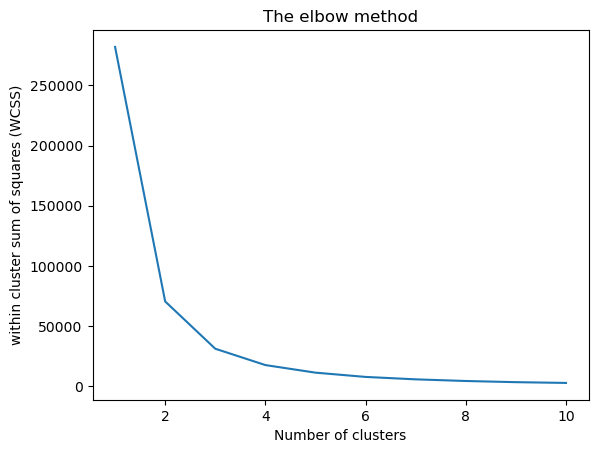

In [23]:
# Plotting the results onto a line graph, 
# allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('within cluster sum of squares (WCSS)') # Within cluster sum of squares
plt.show()

###### It is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration. 
###### From this we choose the number of clusters as '3'.

###  Step-5: Applying K-Means to Dataset

In [24]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)



### Step-6: Visualising Clusters

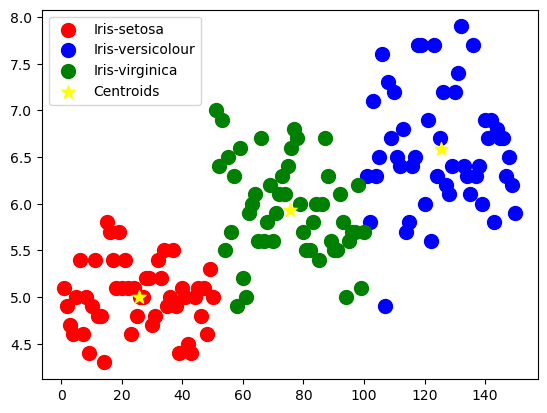

In [25]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', marker='*', label = 'Centroids')

plt.legend()

##### Task 2 Completed, thank you